### Experimenting

In [ ]:
import pandas as pd

# -----------------------------
# 1. Load data
# -----------------------------
bs = pd.read_csv("/content/BS HUL - Sheet1.csv")
pl = pd.read_csv("/content/PL HUL - Sheet1.csv")

# -----------------------------
# 2. Reshape into year-wise format
# (Assuming years are columns like Mar-25, Mar-24, etc.)
# -----------------------------
bs = bs.set_index(bs.columns[0]).T.reset_index().rename(columns={"index": "Year"})
pl = pl.set_index(pl.columns[0]).T.reset_index().rename(columns={"index": "Year"})

# -----------------------------
# 3. Clean numbers (remove commas → float)
# -----------------------------
def clean_numeric(df):
    for col in df.columns:
        if col != "Year":
            df[col] = (
                df[col]
                .astype(str)
                .str.replace(",", "")
                .str.replace("-", "0")  # handle missing as 0 if present
                .astype(float)
            )
    return df

bs = clean_numeric(bs)
pl = clean_numeric(pl)

# -----------------------------
# 4. Derive key fields
# -----------------------------
# From P&L
pl["COGS"] = (
    pl["Cost Of Materials Consumed"]
    + pl["Purchase Of Stock-In Trade"]
    + pl["Changes In Inventories Of FGWIP And Stock In Trade"]
)
revenue = pl["Revenue From Operations [Net]"]

# From Balance Sheet
inventory = bs["Inventories"]
receivables = bs["Trade Receivables"]
total_assets = bs["Total Assets"]
current_assets = bs["Total Current Assets"]
current_liabilities = bs["Total Current Liabilities"]

# Tangible + Intangible for Fixed Assets
fixed_assets = bs["Tangible Assets"] + bs.get("Intangible Assets", 0)

# -----------------------------
# 5. Merge into one dataframe
# -----------------------------
df = pd.DataFrame({
    "Year": bs["Year"],
    "Revenue": revenue,
    "COGS": pl["COGS"],
    "Inventory": inventory,
    "Trade_Receivables": receivables,
    "Total_Assets": total_assets,
    "Current_Assets": current_assets,
    "Current_Liabilities": current_liabilities,
    "Fixed_Assets": fixed_assets,
})

# -----------------------------
# 6. Compute ratios
# -----------------------------
df["Avg_Inventory"] = df["Inventory"].rolling(2).mean().fillna(df["Inventory"])
df["Inventory_Turnover"] = df["COGS"] / df["Avg_Inventory"]
df["Days_Inventory"] = (df["Avg_Inventory"] / df["COGS"]) * 365
df["DSO"] = (df["Trade_Receivables"] / df["Revenue"]) * 365
df["Asset_Turnover"] = df["Revenue"] / df["Total_Assets"]
df["Working_Capital"] = df["Current_Assets"] - df["Current_Liabilities"]
df["Working_Capital_Turnover"] = df["Revenue"] / df["Working_Capital"]
df["Fixed_Asset_Turnover"] = df["Revenue"] / df["Fixed_Assets"]

# -----------------------------
# 7. View final dataframe
# -----------------------------
df

Year  Revenue     COGS  Inventory  Trade_Receivables  Total_Assets  \
0  Mar-25  62288.0  30884.0     4415.0             3819.0       79880.0   
1  Mar-24  60966.0  29782.0     4022.0             2997.0       78499.0   
2  Mar-23  59549.0  31866.0     4251.0             3079.0       73087.0   
3  Mar-22  51548.0  25779.0     4096.0             2236.0       70517.0   
4  Mar-21  46321.0  22958.0     3579.0             1758.0       68757.0   
5  Mar-20  39238.0  18475.0     2767.0             1149.0       20153.0   
6  Mar-19  38684.0  18474.0     2574.0             1816.0       18629.0   
7  Mar-18  34878.0  16874.0     2513.0             1310.0       17862.0   
8  Mar-17  32464.0  16313.0     2541.0             1085.0       15706.0   
9  Mar-16  31461.0  15867.0     2726.0             1264.0       14794.0   

   Current_Assets  Current_Liabilities  Fixed_Assets  Avg_Inventory  \
0         22051.0              16537.0       36869.0         4415.0   
1         21324.0              12876.0       36278.0         4218.5   
2         16998.0              12028.0       35212.0         4136.5   
3         15522.0              11280.0       34076.0         4173.5   
4         14217.0              11103.0       34046.0         3837.5   
5         12321.0               9317.0        5362.0         3173.0   
6         11914.0               8667.0        4598.0         2670.5   
7         11660.0               8887.0        4447.0         2543.5   
8         10172.0               7714.0        4338.0         2527.0   
9         10345.0               7067.0        3177.0         2633.5   

   Inventory_Turnover  Days_Inventory        DSO  Asset_Turnover  \
0            6.995243       52.178312  22.378869        0.779770   
1            7.059855       51.700776  17.942870        0.776647   
2            7.703614       47.380358  18.872441        0.814769   
3            6.176830       59.091800  15.832622        0.731001   
4            5.982541       61.010868  13.852680        0.673691   
5            5.822565       62.687145  10.688236        1.947005   
6            6.917806       52.762396  17.134733        2.076547   
7            6.634166       55.018223  13.709215        1.952637   
8            6.455481       56.541102  12.198897        2.066981   
9            6.025062       60.580292  14.664505        2.126605   

   Working_Capital  Working_Capital_Turnover  Fixed_Asset_Turnover  
0           5514.0                 11.296337              1.689441  
1           8448.0                  7.216619              1.680523  
2           4970.0                 11.981690              1.691156  
3           4242.0                 12.151815              1.512736  
4           3114.0                 14.875080              1.360542  
5           3004.0                 13.061917              7.317792  
6           3247.0                 11.913767              8.413223  
7           2773.0                 12.577714              7.843040  
8           2458.0                 13.207486              7.483633  
9           3278.0                  9.597621              9.902738

In [ ]:
df[["Year","Revenue","Fixed_Assets","Fixed_Asset_Turnover"]]

Year  Revenue  Fixed_Assets  Fixed_Asset_Turnover
0  Mar-25  62288.0       36869.0              1.689441
1  Mar-24  60966.0       36278.0              1.680523
2  Mar-23  59549.0       35212.0              1.691156
3  Mar-22  51548.0       34076.0              1.512736
4  Mar-21  46321.0       34046.0              1.360542
5  Mar-20  39238.0        5362.0              7.317792
6  Mar-19  38684.0        4598.0              8.413223
7  Mar-18  34878.0        4447.0              7.843040
8  Mar-17  32464.0        4338.0              7.483633
9  Mar-16  31461.0        3177.0              9.902738

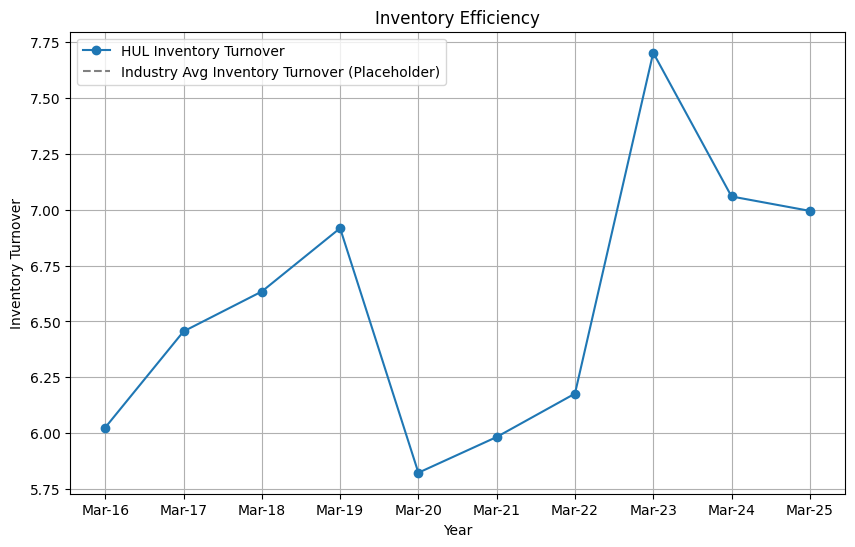

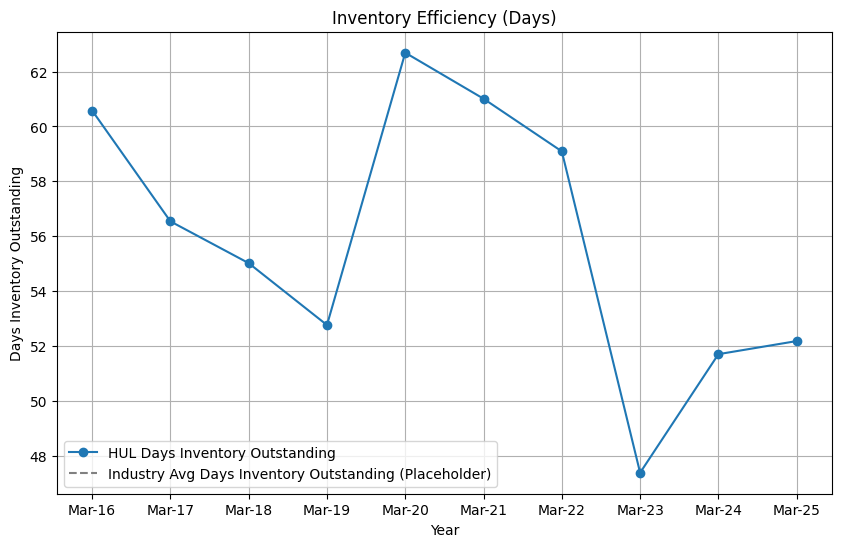

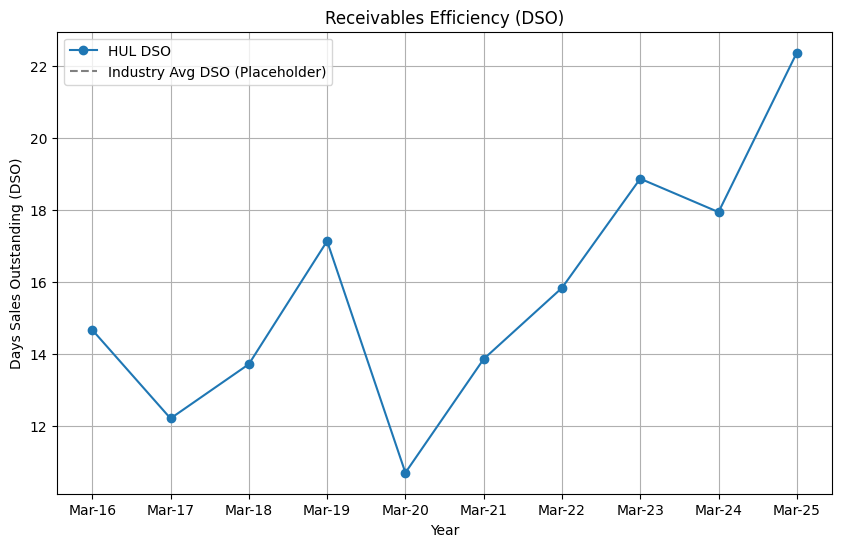

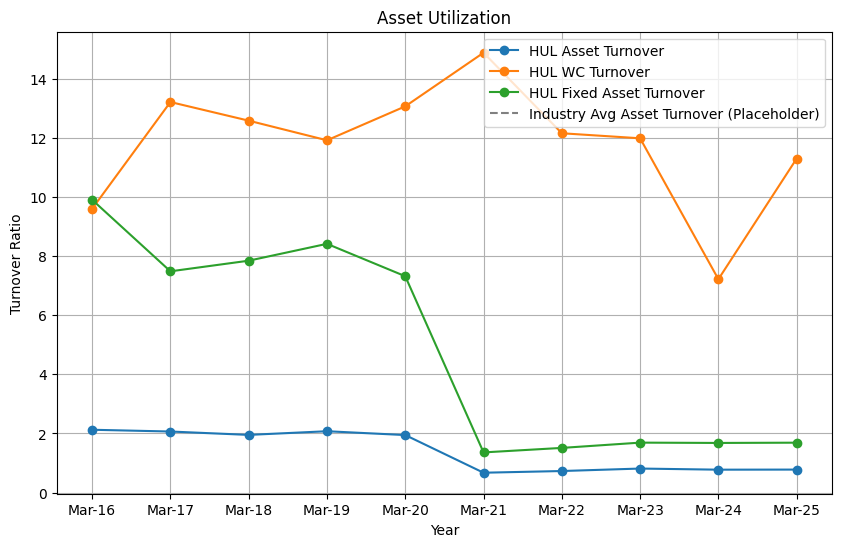

In [ ]:
import matplotlib.pyplot as plt

# Ensure the 'Year' column is treated as categorical for plotting
df['Year'] = df['Year'].astype(str)

# Reverse the DataFrame to plot years in ascending order
df_reversed = df.iloc[::-1].reset_index(drop=True)


# Chart 1: Inventory Efficiency
plt.figure(figsize=(10, 6))
plt.plot(df_reversed['Year'], df_reversed['Inventory_Turnover'], marker='o', linestyle='-', label='HUL Inventory Turnover')
# Placeholder for industry average
plt.plot(df_reversed['Year'], [None] * len(df_reversed), linestyle='--', color='gray', label='Industry Avg Inventory Turnover (Placeholder)')
plt.title('Inventory Efficiency')
plt.xlabel('Year')
plt.ylabel('Inventory Turnover')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(df_reversed['Year'], df_reversed['Days_Inventory'], marker='o', linestyle='-', label='HUL Days Inventory Outstanding')
# Placeholder for industry average
plt.plot(df_reversed['Year'], [None] * len(df_reversed), linestyle='--', color='gray', label='Industry Avg Days Inventory Outstanding (Placeholder)')
plt.title('Inventory Efficiency (Days)')
plt.xlabel('Year')
plt.ylabel('Days Inventory Outstanding')
plt.legend()
plt.grid(True)
plt.show()

# Chart 2: Receivables Efficiency
plt.figure(figsize=(10, 6))
plt.plot(df_reversed['Year'], df_reversed['DSO'], marker='o', linestyle='-', label='HUL DSO')
# Placeholder for industry average
plt.plot(df_reversed['Year'], [None] * len(df_reversed), linestyle='--', color='gray', label='Industry Avg DSO (Placeholder)')
plt.title('Receivables Efficiency (DSO)')
plt.xlabel('Year')
plt.ylabel('Days Sales Outstanding (DSO)')
plt.legend()
plt.grid(True)
plt.show()

# Chart 3: Asset Utilization
plt.figure(figsize=(10, 6))
plt.plot(df_reversed['Year'], df_reversed['Asset_Turnover'], marker='o', linestyle='-', label='HUL Asset Turnover')
plt.plot(df_reversed['Year'], df_reversed['Working_Capital_Turnover'], marker='o', linestyle='-', label='HUL WC Turnover')
plt.plot(df_reversed['Year'], df_reversed['Fixed_Asset_Turnover'], marker='o', linestyle='-', label='HUL Fixed Asset Turnover')
# Placeholders for industry averages
plt.plot(df_reversed['Year'], [None] * len(df_reversed), linestyle='--', color='gray', label='Industry Avg Asset Turnover (Placeholder)')
plt.plot(df_reversed['Year'], [None] * len(df_reversed), linestyle='--', color='gray') # No label needed for additional dashed lines
plt.plot(df_reversed['Year'], [None] * len(df_reversed), linestyle='--', color='gray') # No label needed for additional dashed lines
plt.title('Asset Utilization')
plt.xlabel('Year')
plt.ylabel('Turnover Ratio')
plt.legend()
plt.grid(True)
plt.show()

### Main code


In [ ]:
import pandas as pd
import numpy as np

def process_company(bs_path, pl_path, name):
    # Read CSVs (adjust skiprows if your files actually have extra header rows)
    bs = pd.read_csv(bs_path, skiprows=[1])
    pl = pd.read_csv(pl_path, skiprows=[1])

    # Reshape so years become rows
    bs = bs.set_index(bs.columns[0]).T.reset_index().rename(columns={"index": "Year"})
    pl = pl.set_index(pl.columns[0]).T.reset_index().rename(columns={"index": "Year"})

    # Robust numeric cleaning
    def clean_numeric(df):
        df = df.copy()
        for col in df.columns:
            if col == "Year":
                continue
            s = df[col].astype(str).str.strip()

            # Remove commas from all values
            s = s.str.replace(",", "", regex=False)

            # Convert lone dashes or empty strings (missing data) to NaN,
            # but preserve negative numbers like "-1234"
            s = s.replace(r'^\s*[-–—]\s*$', np.nan, regex=True)
            s = s.replace(r'^\s*$', np.nan, regex=True)

            # Finally coerce to numeric (safe)
            df[col] = pd.to_numeric(s, errors="coerce")

        return df

    bs = clean_numeric(bs)
    pl = clean_numeric(pl)

    # Helper to safely pull columns (returns series of NaNs if not present)
    def safe_col(df, name_variants):
        for n in name_variants:
            if n in df.columns:
                return df[n]
        return pd.Series(np.nan, index=df.index)

    # Common column name variants - adjust if your files use different exact names
    revenue = safe_col(pl, ["Revenue From Operations [Net]", "Revenue From Operations", "Total Revenue", "Revenue"])
    cost_of_materials = safe_col(pl, ["Cost Of Materials Consumed", "Cost of materials consumed"])
    purchase_stock = safe_col(pl, ["Purchase Of Stock-In Trade", "Purchase Of Stock-in-Trade", "Purchase Of Stock In Trade"])
    change_in_inv = safe_col(pl, ["Changes In Inventories Of FGWIP And Stock In Trade",
                                  "Change in inventories", "Changes In Inventories"])

    # Derive COGS - note: whether you add or subtract `change_in_inv` depends on sign/convention in your P&L.
    # Most Indian P&Ls show "Change in inventories" so that adding it is correct (it may be positive or negative).
    COGS = cost_of_materials.fillna(0) + purchase_stock.fillna(0) + change_in_inv.fillna(0)

    # Balance sheet items (use safe names)
    inventory = safe_col(bs, ["Inventories", "Inventory"])
    receivables = safe_col(bs, ["Trade Receivables", "Receivables"])
    payables = safe_col(bs, ["Trade Payables", "Payables"])
    total_assets = safe_col(bs, ["Total Assets"])
    current_assets = safe_col(bs, ["Total Current Assets", "Current Assets", "Total Current Assets"])
    current_liabilities = safe_col(bs, ["Total Current Liabilities", "Current Liabilities"])
    tangible = safe_col(bs, ["Tangible Assets", "Property, Plant and Equipment", "Fixed Assets"])
    intangible = safe_col(bs, ["Intangible Assets", "Intangible"])

    fixed_assets = tangible.fillna(0) + intangible.fillna(0)

    df = pd.DataFrame({
        "Year": bs["Year"],
        "Company": name,
        "Revenue": revenue,
        "COGS": COGS,
        "Inventory": inventory,
        "Trade_Receivables": receivables,
        "Trade_Payables": payables,
        "Total_Assets": total_assets,
        "Current_Assets": current_assets,
        "Current_Liabilities": current_liabilities,
        "Fixed_Assets": fixed_assets,
    })

    # Ensure numeric dtype for calculations
    numeric_cols = ["Revenue","COGS","Inventory","Trade_Receivables","Trade_Payables",
                    "Total_Assets","Current_Assets","Current_Liabilities","Fixed_Assets"]
    df[numeric_cols] = df[numeric_cols].astype(float)

    # ---- RATIOS / DERIVED METRICS ----
    # Average inventory: explicit (Prev_close + Current_close) / 2
    df["Avg_Inventory"] = (df["Inventory"] + df["Inventory"].shift(1)) / 2
    # Explicit Average Inventory
    df.loc[0, "Avg_Inventory"] = df.loc[0, "Inventory"]



    # Inventory Turnover
    df["Inventory_Turnover"] = df["COGS"] / df["Avg_Inventory"]

    # Days Inventory outstanding (avoid divide-by-zero)
    df["Days_Inventory"] = np.where(df["COGS"] != 0,
                                    (df["Avg_Inventory"] / df["COGS"]) * 365,
                                    np.nan)

    # Days Sales Outstanding
    df["DSO"] = np.where(df["Revenue"] != 0,
                         (df["Trade_Receivables"] / df["Revenue"]) * 365,
                         np.nan)

    # Days Payables Outstanding - note: some analysts prefer to use Purchases rather than COGS.
    df["DPO"] = np.where(df["COGS"] != 0,
                         (df["Trade_Payables"] / df["COGS"]) * 365,
                         np.nan)

    # Cash Conversion Cycle
    df["CCC"] = df["DSO"] + df["Days_Inventory"] - df["DPO"]

    # Other turnovers (guard against division by zero)
    df["Asset_Turnover"] = np.where(df["Total_Assets"] != 0, df["Revenue"] / df["Total_Assets"], np.nan)
    df["Working_Capital"] = df["Current_Assets"] - df["Current_Liabilities"]
    df["Working_Capital_Turnover"] = np.where(df["Working_Capital"] != 0, df["Revenue"] / df["Working_Capital"], np.nan)
    df["Fixed_Asset_Turnover"] = np.where(df["Fixed_Assets"] != 0, df["Revenue"] / df["Fixed_Assets"], np.nan)

    # Replace infinities with NaN (in case you get division by zero)
    df.replace([np.inf, -np.inf], np.nan, inplace=True)

    return df

companies = {
    "HUL": ("BS HUL - Sheet1.csv", "PL HUL - Sheet1.csv"),
    "Dabur": ("BS Dabur - Sheet1.csv", "PL Dabur - Sheet1.csv"),
    "ITC": ("BS ITC - Sheet1.csv", "PL ITC - Sheet1.csv"),
    "Marico": ("BS Marico - Sheet1.csv", "PL Marico - Sheet1.csv"),
    "Britannia": ("BS brit - Sheet1.csv", "PL brit - Sheet1.csv"),
}
dfs = []
for name, (bs_path, pl_path) in companies.items():
    dfs.append(process_company(bs_path, pl_path, name))

all_company_df = pd.concat(dfs, ignore_index=True)
all_company_df["Year"] = (
    all_company_df["Year"]
    .astype(str)
    .str.strip()
    .str.replace("-", " ", regex=False)   # unify '-' and ' '
    .str.replace(r"\s+", " ", regex=True) # collapse multiple spaces
)

In [ ]:
print(all_company_df[["Inventory_Turnover","Company","Year","Days_Inventory"]])

    Inventory_Turnover    Company    Year  Days_Inventory
0             6.925934        HUL  Mar 25       52.700471
1             7.054640        HUL  Mar 24       51.738995
2             7.667352        HUL  Mar 23       47.604443
3             6.166287        HUL  Mar 22       59.192831
4             5.771466        HUL  Mar 21       63.242166
5             5.754491        HUL  Mar 20       63.428720
6             6.917806        HUL  Mar 19       52.762396
7             6.577551        HUL  Mar 18       55.491781
8             6.455481        HUL  Mar 17       56.541102
9             6.025062        HUL  Mar 16       60.580292
10            2.841108      Dabur  Mar 25      128.471023
11            3.035949      Dabur  Mar 24      120.225982
12            3.157090      Dabur  Mar 23      115.612805
13            2.866009      Dabur  Mar 22      127.354788
14            2.618962      Dabur  Mar 21      139.368175
15            2.788375      Dabur  Mar 20      130.900637
16            

In [ ]:
# Ratios we want to average
core_ratio_cols = [
    "Inventory_Turnover", "Days_Inventory", "DSO", "DPO", "CCC",
    "Asset_Turnover", "Working_Capital_Turnover", "Fixed_Asset_Turnover"
]

# 1) Normalize Year
all_company_df["Year"] = all_company_df["Year"].astype(str).str.strip()

# 2) Keep only core ratios
final_core = all_company_df[["Year", "Company"] + core_ratio_cols].copy()

# 3) HUL only
hul_core = final_core[final_core["Company"] == "HUL"].copy()
valid_years = hul_core["Year"].unique().tolist()

# 4) Industry Avg (exclude HUL, only HUL years)
industry_avg = (
    final_core[final_core["Company"] != "HUL"]
    .groupby("Year", as_index=False)[core_ratio_cols]
    .mean()
)
industry_avg = industry_avg[industry_avg["Year"].isin(valid_years)].copy()
industry_avg["Company"] = "Industry Avg"

# 5) Reorder each separately
hul_core["Year"] = pd.Categorical(hul_core["Year"], categories=valid_years, ordered=True)
industry_avg["Year"] = pd.Categorical(industry_avg["Year"], categories=valid_years, ordered=True)

hul_core = hul_core.sort_values("Year").reset_index(drop=True)
industry_avg = industry_avg.sort_values("Year").reset_index(drop=True)

# 6) Final concat
ps3_df = pd.concat([hul_core, industry_avg], ignore_index=True)

# 7) Round
ps3_df[core_ratio_cols] = ps3_df[core_ratio_cols].round(2)

ps3_df


Year       Company  Inventory_Turnover  Days_Inventory    DSO     DPO  \
0   Mar 25           HUL                6.93           52.70  22.38  135.06   
1   Mar 24           HUL                7.05           51.74  17.94  128.61   
2   Mar 23           HUL                7.67           47.60  18.87  110.18   
3   Mar 22           HUL                6.17           59.19  15.83  128.61   
4   Mar 21           HUL                5.77           63.24  13.85  145.06   
5   Mar 20           HUL                5.75           63.43  10.69  150.63   
6   Mar 19           HUL                6.92           52.76  17.13  142.37   
7   Mar 18           HUL                6.58           55.49  13.71  156.43   
8   Mar 17           HUL                6.46           56.54  12.20  138.41   
9   Mar 16           HUL                6.03           60.58  14.66  130.78   
10  Mar 25  Industry Avg                4.45          108.86  25.45   91.33   
11  Mar 24  Industry Avg                4.10          116.85  24.27   96.37   
12  Mar 23  Industry Avg                4.41          103.27  22.06   85.03   
13  Mar 22  Industry Avg                4.03          106.89  17.66   83.87   
14  Mar 21  Industry Avg                3.52          125.36  16.31   96.15   
15  Mar 20  Industry Avg                3.78          126.58  22.74   87.21   
16  Mar 19  Industry Avg                4.19          115.07  26.50   86.64   
17  Mar 18  Industry Avg                3.96          125.75  21.86   91.06   
18  Mar 17  Industry Avg                3.94          128.90  18.79   81.81   
19  Mar 16  Industry Avg                4.23          127.14  19.72   81.89   

      CCC  Asset_Turnover  Working_Capital_Turnover  Fixed_Asset_Turnover  
0  -59.98            0.78                     11.30                  1.69  
1  -58.93            0.78                      7.22                  1.68  
2  -43.70            0.81                     11.98                  1.69  
3  -53.59            0.73                     12.15                  1.51  
4  -67.96            0.67                     14.88                  1.36  
5  -76.51            1.95                     13.06                  7.32  
6  -72.48            2.08                     11.91                  8.41  
7  -87.23            1.95                     12.58                  7.84  
8  -69.67            2.07                     13.21                  7.48  
9  -55.53            2.13                      9.60                  9.90  
10  42.98            1.22                     17.89                  4.74  
11  44.75            1.17                      9.34                  4.40  
12  40.30            1.19                     13.42                  4.93  
13  40.67            1.29                    -13.67                  6.25  
14  45.52            1.15                      7.30                  5.73  
15  62.11            1.12                      5.21                  5.45  
16  54.93            1.23                      5.69                  5.96  
17  56.56            1.25                      5.34                  6.38  
18  65.88            1.39                      6.23                  6.51  
19  64.97            1.51                      9.72                  7.19

In [ ]:
print(ps3_df)

      Year       Company  Inventory_Turnover  Days_Inventory    DSO     DPO  \
0   Mar 25           HUL                6.93           52.70  22.38  135.06   
1   Mar 24           HUL                7.05           51.74  17.94  128.61   
2   Mar 23           HUL                7.67           47.60  18.87  110.18   
3   Mar 22           HUL                6.17           59.19  15.83  128.61   
4   Mar 21           HUL                5.77           63.24  13.85  145.06   
5   Mar 20           HUL                5.75           63.43  10.69  150.63   
6   Mar 19           HUL                6.92           52.76  17.13  142.37   
7   Mar 18           HUL                6.58           55.49  13.71  156.43   
8   Mar 17           HUL                6.46           56.54  12.20  138.41   
9   Mar 16           HUL                6.03           60.58  14.66  130.78   
10  Mar 25  Industry Avg                4.45          108.86  25.45   91.33   
11  Mar 24  Industry Avg                4.10        

In [ ]:
ps3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Year                      20 non-null     category
 1   Company                   20 non-null     object  
 2   Inventory_Turnover        20 non-null     float64 
 3   Days_Inventory            20 non-null     float64 
 4   DSO                       20 non-null     float64 
 5   DPO                       20 non-null     float64 
 6   CCC                       20 non-null     float64 
 7   Asset_Turnover            20 non-null     float64 
 8   Working_Capital_Turnover  20 non-null     float64 
 9   Fixed_Asset_Turnover      20 non-null     float64 
dtypes: category(1), float64(8), object(1)
memory usage: 1.9+ KB


In [ ]:
latest = hul_core["Year"].iloc[0]   # your ordering already puts latest first
peers_latest = final_core[(final_core["Year"]==latest) & (final_core["Company"]!="HUL")]
print("Peers (latest):\n", peers_latest.set_index("Company")[core_ratio_cols])

mean_ind = peers_latest[core_ratio_cols].mean().rename("Mean_Industry")
median_ind = peers_latest[core_ratio_cols].median().rename("Median_Industry")
print("\nMean vs Median (latest):\n", pd.concat([mean_ind, median_ind], axis=1))
hul = ps3_df[ps3_df["Company"]=="HUL"].set_index("Year")
ind = ps3_df[ps3_df["Company"]=="Industry Avg"].set_index("Year")

abs_gap = (hul[core_ratio_cols] - ind[core_ratio_cols]).reset_index().assign(Metric="AbsGap")
pct_gap = ((abs_gap[core_ratio_cols].set_index(abs_gap["Year"]) / ind[core_ratio_cols].replace(0,np.nan)) * 100).reset_index().assign(Metric="PctGap")

abs_gap.to_csv("ps3_abs_gap.csv", index=False)
pct_gap.to_csv("ps3_pct_gap.csv", index=False)
print("Saved ps3_abs_gap.csv and ps3_pct_gap.csv")


Peers (latest):
            Inventory_Turnover  Days_Inventory        DSO         DPO  \
Company                                                                
Dabur                2.841108      128.471023  26.153406  157.807375   
ITC                  2.019351      180.751171  23.075726   54.869754   
Marico               4.362753       83.662769  43.223237   92.333890   
Britannia            8.575790       42.561677   9.338036   60.313178   

                  CCC  Asset_Turnover  Working_Capital_Turnover  \
Company                                                           
Dabur       -3.182945        0.763911                  5.600677   
ITC        148.957143        0.847460                  2.525555   
Marico      34.552116        1.287239                  4.093440   
Britannia   -8.413464        1.983925                 59.356239   

           Fixed_Asset_Turnover  
Company                          
Dabur                  3.459245  
ITC                    3.545142  
Marico     

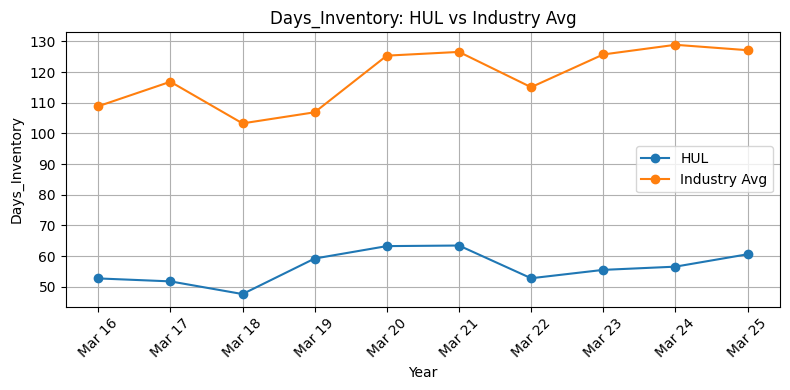

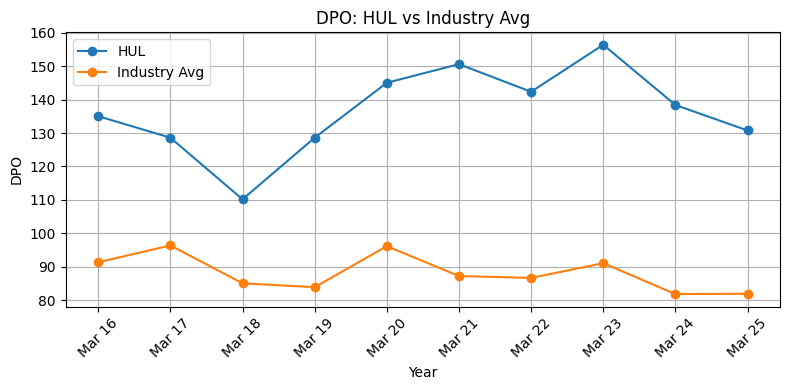

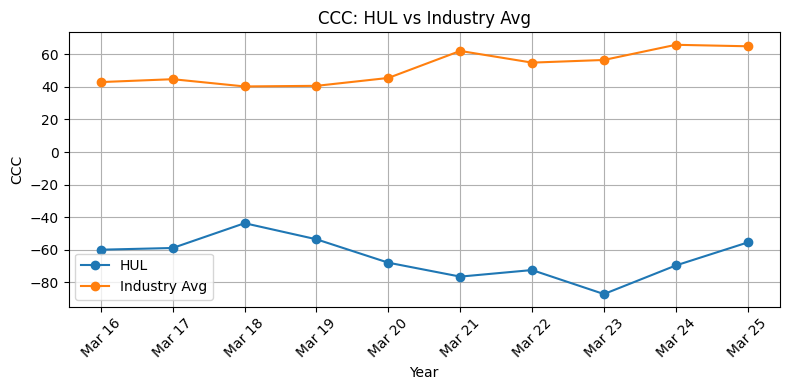

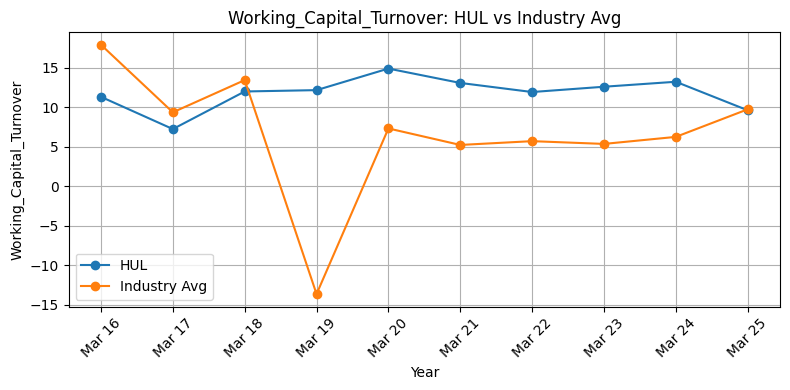

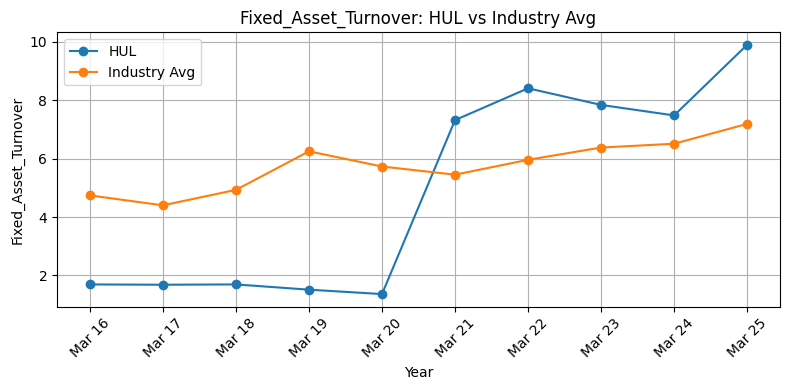

Saved ratio trend plots to ps3_plots/ and displayed inline.


In [ ]:
import matplotlib.pyplot as plt, os
os.makedirs("ps3_plots", exist_ok=True)
years = sorted(hul.index.tolist())  # ensures 2019 → 2025 order

for col in core_ratio_cols:
    plt.figure(figsize=(8,4))
    plt.plot(years, hul[col], marker='o', label='HUL')
    plt.plot(years, ind[col], marker='o', label='Industry Avg')
    plt.title(f"{col}: HUL vs Industry Avg")
    plt.xlabel("Year")
    plt.ylabel(col)
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()

    # save first, then display inline
    savepath = f"ps3_plots/{col}_hul_vs_ind.png"
    plt.savefig(savepath, dpi=150, bbox_inches='tight')
    plt.show()   # <-- this prints the figure inline in Colab
    plt.close()

print("Saved ratio trend plots to ps3_plots/ and displayed inline.")
